c:\Users\franc\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9300 - loss: 0.2373 - val_accuracy: 0.9599 - val_loss: 0.1316
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9694 - loss: 0.1002 - val_accuracy: 0.9699 - val_loss: 0.0959
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9774 - loss: 0.0718 - val_accuracy: 0.9740 - val_loss: 0.0858
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9718 - val_loss: 0.0924
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.9763 - val_loss: 0.0799
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
Dataset MNIST - Dígitos manuscritos


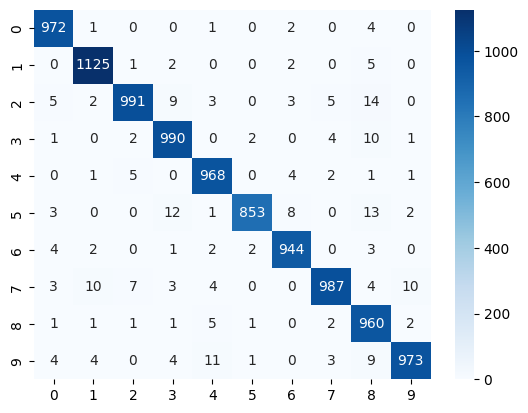

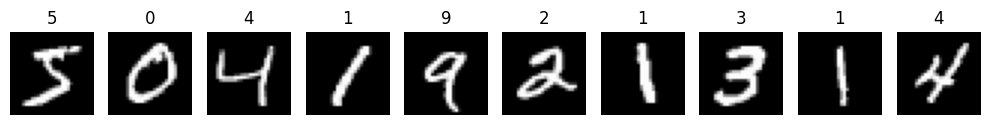

10 primeiras previsões:


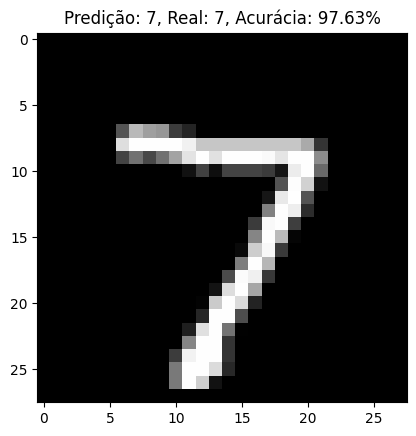

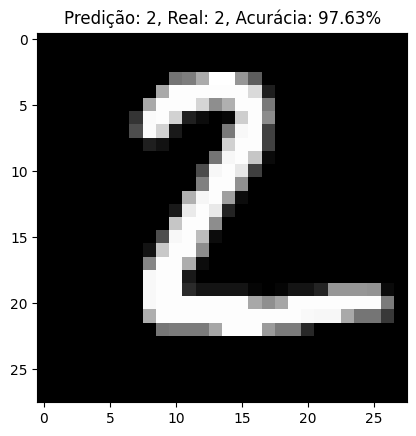

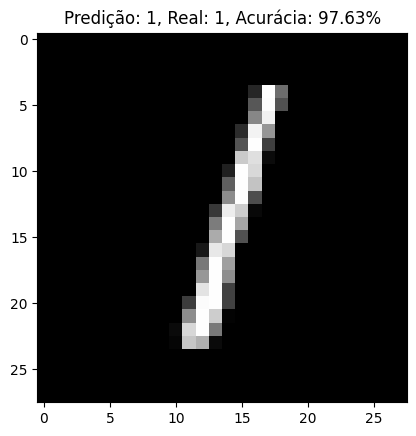

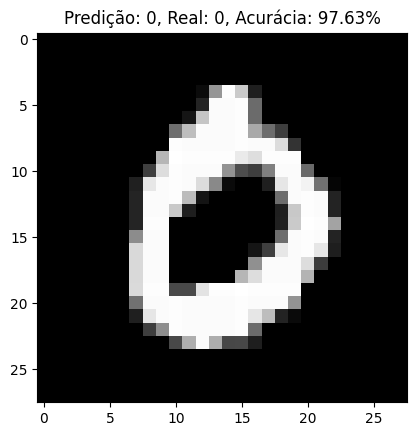

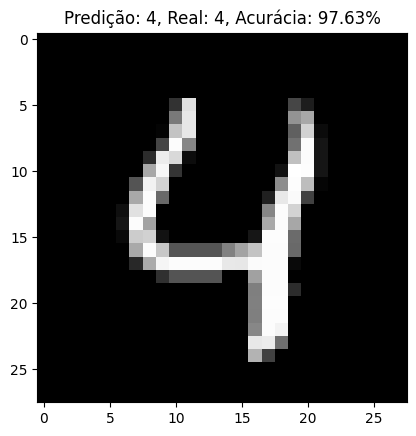

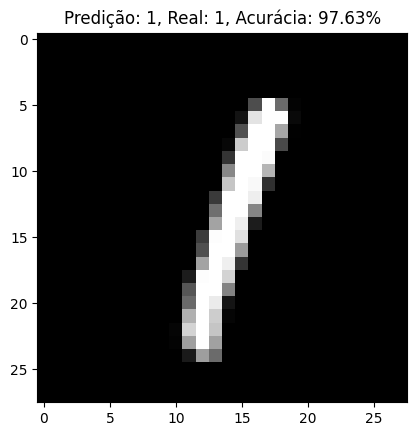

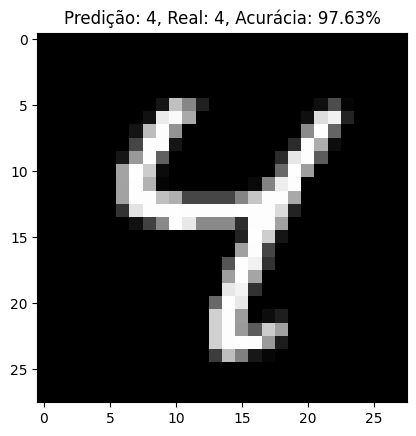

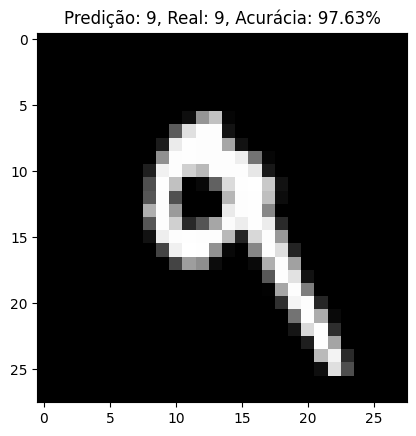

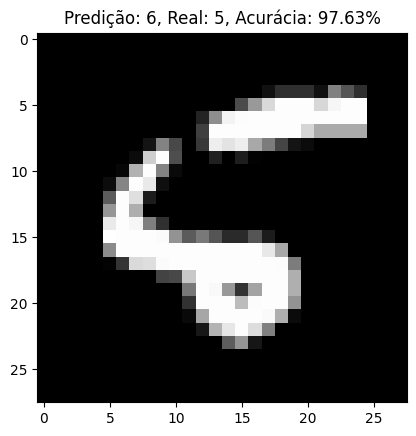

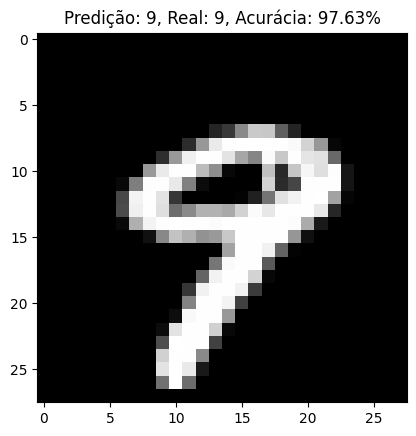

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(x_train,y_train),(x_test,y_test) = mnist.load_data()#Dataset mnist
x_train,x_test = x_train / 255.0, x_test / 255.0 #Normalização dos dados 

modelo = models.Sequential([ #Rede neural
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
6
modelo.compile(optimizer='adam', #Compilação do modelo
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))#Treinamento do modelo

previsao = modelo.predict(x_test)
previsao_categoria = np.argmax(previsao, axis=1)

matriz_confusao = confusion_matrix(y_test, previsao_categoria)
acuracia = accuracy_score(y_test, previsao_categoria)


sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')

print("Dataset MNIST - Dígitos manuscritos")
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1) 
    plt.imshow(x_train[i], cmap='gray') 
    plt.title(y_train[i])  
    plt.axis('off')  
plt.tight_layout()
plt.show()


print("10 primeiras previsões:")
for i in range(10):
    plt.title(f"Predição: {previsao_categoria[i]}, Real: {y_test[i]}, Acurácia: {acuracia:.2%}")
    plt.imshow(x_test[i], cmap='gray')
    plt.show()